In [5]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [7]:
N = 90
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

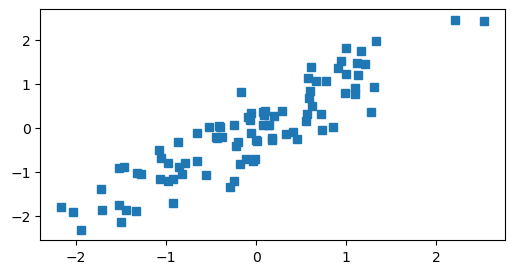

In [10]:
plt.figure(figsize=(6,3))
plt.plot(x,y,'s')
plt.show()

In [ ]:
ANN_reg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1)  #output layer  
)

In [12]:
learning_rate = 0.05
loss_fun = nn.MSELoss() #loss function
optimizer = torch.optim.SGD(ANN_reg.parameters(),lr=learning_rate)


In [ ]:
epochs = 500
losses = torch.zeros(epochs)
for ep in range(epochs):
    #forward pass 
    y_HAT = ANN_reg(x)

    #compute losses
    loss = loss_fun(y_HAT,y)
    losses[ep]=loss

    #backpropagate
    optimizer.zero_grad() #clears out the gradient info from previous epoch
    loss.backward() #compute loss values based on the loss function
    optimizer.step() # propogates those errors

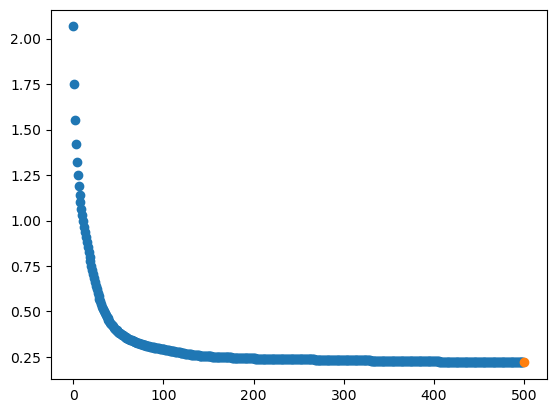

In [15]:
predictions = ANN_reg(x)
testloss =(predictions-y).pow(2).mean() # mean squared loss error
plt.plot(losses.detach(),'o')
plt.plot(epochs,testloss.detach(),"o")
plt.show()

In [16]:
predictions

tensor([[-0.7924],
        [ 0.7205],
        [ 0.0936],
        [-0.0230],
        [ 0.9298],
        [ 1.0977],
        [-1.5242],
        [ 0.1269],
        [-1.5216],
        [-0.2558],
        [-0.3864],
        [-1.3374],
        [-0.0406],
        [-0.4507],
        [-0.0991],
        [ 0.5657],
        [ 0.2790],
        [ 0.9831],
        [ 0.1699],
        [-0.9804],
        [ 1.0756],
        [ 0.0752],
        [-2.0270],
        [-0.0633],
        [-0.5284],
        [ 1.6221],
        [ 0.7101],
        [-1.4386],
        [ 0.0706],
        [-0.8645],
        [-0.0680],
        [-1.2759],
        [-0.3003],
        [ 1.1179],
        [ 1.2606],
        [-1.0700],
        [-1.7032],
        [-0.9286],
        [-0.9310],
        [-0.1740],
        [ 1.3087],
        [-0.6639],
        [-0.8258],
        [ 1.1478],
        [ 0.5455],
        [ 0.1713],
        [ 1.2895],
        [ 1.0837],
        [-1.4612],
        [-0.9758],
        [-0.2567],
        [ 0.7568],
        [ 1.

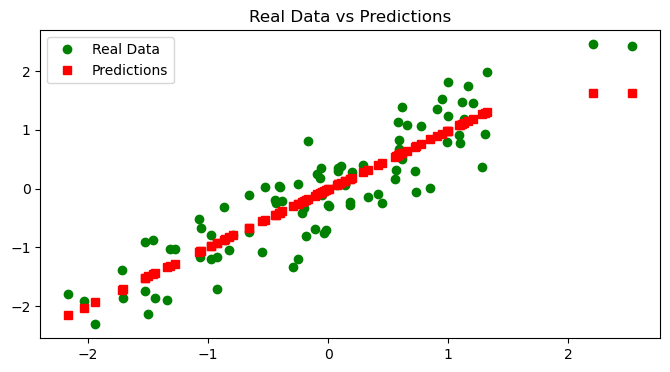

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(x,y,'go',label="Real Data")
plt.plot(x,predictions.detach(),'rs',label="Predictions")
plt.legend()
plt.title("Real Data vs Predictions")
plt.show()